In [1]:
import os
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from classifier.helpers import show_stats_from_file

from models.models import ConvolutionNeuralNetwork
from classifier.models import Classifier
from data.load import (get_testing_set, get_training_set, get_validation_set,
                       load_from_file, load_sets_from_file, reformat, reformat_3d)

from model_trainer.models import ModelTrainer

from data.constants import saved_sessions_root

from models.models import ConvolutionNeuralNetwork, NeuralNetwork
from classifier.models import Classifier

In [2]:
% matplotlib inline

In [3]:
datasets = load_sets_from_file()

train_data, train_labels = get_training_set(datasets, size=15000)
valid_data, valid_labels = get_validation_set(datasets, size=3000)
test_data, test_labels = get_testing_set(datasets, size=3000)
del datasets

train_dataset, train_labels = reformat_3d(train_data, train_labels)
valid_dataset, valid_labels = reformat_3d(valid_data, valid_labels)
test_dataset, test_labels = reformat_3d(test_data, test_labels)

print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

('Training set', (15000, 28, 28, 1), (15000, 10))
('Validation set', (3000, 28, 28, 1), (3000, 10))
('Test set', (3000, 28, 28, 1), (3000, 10))


In [4]:
model = ConvolutionNeuralNetwork()
classifier = Classifier(model)
classifier.train(train_dataset, train_labels, valid_dataset, valid_labels, test_dataset,
                 test_labels, save=False, from_disk=False)

Step: 0: l=5.881964 l_valid=54.419575 l_test=54.718224 minibatch=15.0% valid=9.7% test=9.9%
Step: 50: l=1.973876 l_valid=2.016029 l_test=1.962649 minibatch=25.0% valid=25.7% test=27.3%
Step: 100: l=1.487914 l_valid=1.229459 l_test=1.082631 minibatch=51.0% valid=63.5% test=69.0%
Step: 150: l=1.144102 l_valid=0.888163 l_test=0.714546 minibatch=62.0% valid=74.8% test=81.9%
Step: 200: l=0.859091 l_valid=0.753474 l_test=0.563678 minibatch=72.0% valid=77.9% test=84.6%
Step: 250: l=0.783729 l_valid=0.657708 l_test=0.464437 minibatch=81.0% valid=80.3% test=86.8%
Step: 300: l=1.065333 l_valid=0.636816 l_test=0.450509 minibatch=73.0% valid=81.4% test=88.0%
Step: 350: l=0.648572 l_valid=0.593048 l_test=0.401636 minibatch=80.0% valid=81.9% test=88.4%
Step: 400: l=0.653560 l_valid=0.572378 l_test=0.370835 minibatch=82.0% valid=82.6% test=89.2%
Step: 450: l=0.738067 l_valid=0.573355 l_test=0.393321 minibatch=76.0% valid=83.2% test=89.3%
Step: 500: l=0.629812 l_valid=0.541204 l_test=0.350302 minibatc

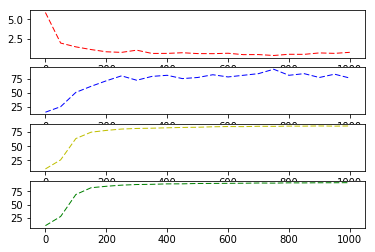

In [6]:
classifier.stats()

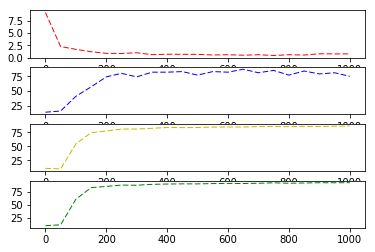

In [7]:
show_stats_from_file('convolution_3_layer.session-stats.pickle')

In [8]:
def show_stats(steps, losses, accuracies):
    # % matplotlib inline
    fig = plt.figure()

    fig.add_subplot(4, 2, 1)
    plt.plot(steps, losses['minibatch_train'], 'r--', linewidth=1)

    fig.add_subplot(4, 2, 2)
    plt.plot(steps, losses['minibatch_train'], 'r--',
             losses['validation'], 'b--',
             losses['test'], 'g--',
             linewidth=1)
    
    fig.add_subplot(4, 1, 2)
    plt.plot(steps, accuracies['minibatch_train'], 'b--', linewidth=1)

    fig.add_subplot(4, 1, 3)
    plt.plot(steps, accuracies['validation'], 'y--', linewidth=1)

    fig.add_subplot(4, 1, 4)
    plt.plot(steps, accuracies['test'], 'g--', linewidth=1)

[54.419575, 2.0160286, 1.2294587, 0.88816261, 0.7534737, 0.65770775, 0.63681638, 0.59304804, 0.57237774, 0.5733552, 0.54120386, 0.52484423, 0.51666522, 0.50942147, 0.49324879, 0.50865811, 0.48801929, 0.48086801, 0.47966149, 0.47678468, 0.47089344]


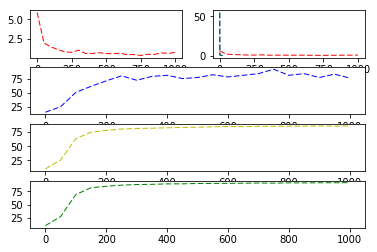

In [9]:
print(classifier.trainer.losses['validation'])
show_stats(classifier.trainer.steps, classifier.trainer.losses, classifier.trainer.accuracies)